# Problem 1

In [17]:
import sympy as sy
import numpy as np

In [77]:
x = sy.symbols('x')

In [78]:
f1 = sy.lambdify(x,(sy.sin(x)+1)**(sy.sin(sy.cos(x))),'numpy')

In [79]:
f2 = sy.lambdify(x,sy.diff((sy.sin(x)+1)**(sy.sin(sy.cos(x))), x),'numpy')

In [80]:
xgrid = np.linspace(-np.pi, np.pi, num=100)

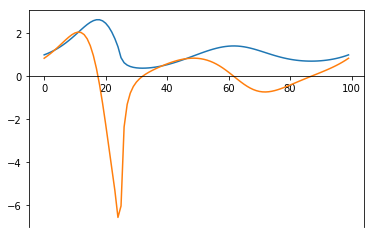

In [53]:
from matplotlib import pyplot as plt
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
plt.plot(f1(xgrid))
plt.plot(f2(xgrid))
plt.show()

# Problem 2

In [54]:
h = max(np.max(np.absolute(xgrid)),1)*np.sqrt(np.finfo(float).eps)

In [32]:
def forward_order1(f, x, h):
    return (f(x+h)-f(x))/h

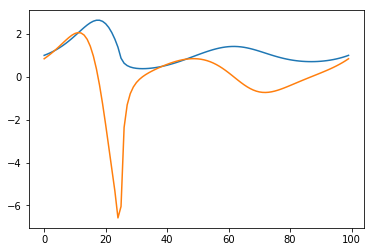

In [72]:
plt.plot(f1(xgrid))
plt.plot(forward_order1(f1, xgrid, h))
plt.show()

In [61]:
def forward_order2(f, x, h):
    return (-3*f(x) + 4*f(x+h) - f(x+2*h))/(2*h)

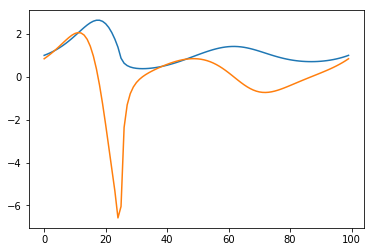

In [62]:
plt.plot(f1(xgrid))
plt.plot(forward_order2(f1, xgrid, h))
plt.show()

In [63]:
def backward_order1(f, x, h):
    return (f(x)-f(x-h))/h

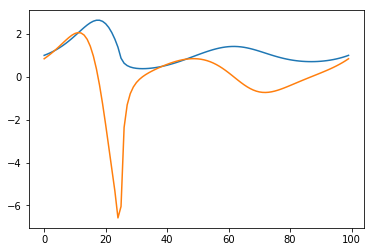

In [64]:
plt.plot(f1(xgrid))
plt.plot(backward_order1(f1, xgrid, h))
plt.show()

In [67]:
def backward_order2(f, x, h):
    return (3*f(x)-4*f(x-h)+f(x-2*h))/(2*h)

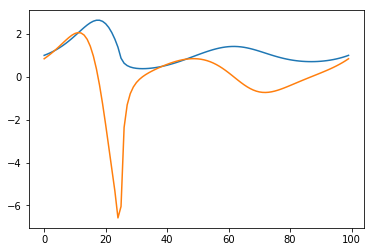

In [68]:
plt.plot(f1(xgrid))
plt.plot(backward_order2(f1, xgrid, h))
plt.show()

In [69]:
def centered_order2(f, x, h):
    return (f(x+h)-f(x-h))/(2*h)

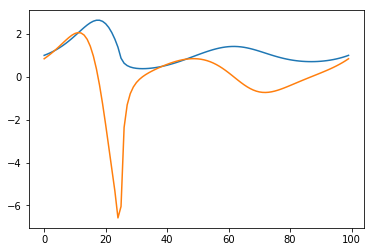

In [70]:
plt.plot(f1(xgrid))
plt.plot(centered_order2(f1, xgrid, h))
plt.show()

In [73]:
def centered_order4(f, x, h):
    return((f(x-2*h) - 8*f(x-h) + 8*f(x+h)-f(x+2*h))/(12*h))

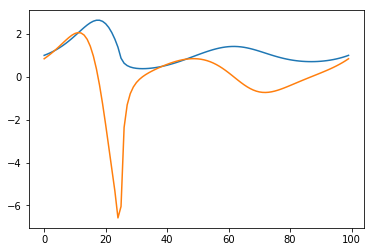

In [74]:
plt.plot(f1(xgrid))
plt.plot(centered_order2(f1, xgrid, h))
plt.show()

# Problem 3

In [95]:
x0 = 1

In [90]:
hgrid = np.logspace(-8, 0, 9)

In [101]:
o1f_err = np.absolute(f2(x0) - forward_order1(f1, x0, hgrid))
o2f_err = np.absolute(f2(x0) - forward_order2(f1, x0, hgrid))
o1b_err = np.absolute(f2(x0) - backward_order1(f1, x0, hgrid))
o2b_err = np.absolute(f2(x0) - backward_order2(f1, x0, hgrid))
o2c_err = np.absolute(f2(x0) - centered_order2(f1, x0, hgrid))
o4c_err = np.absolute(f2(x0) - centered_order4(f1, x0, hgrid))

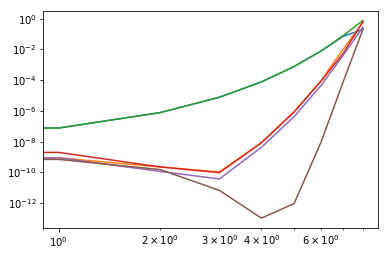

In [102]:
plt.loglog(o1f_err)
plt.loglog(o2f_err)
plt.loglog(o1b_err)
plt.loglog(o2b_err)
plt.loglog(o2c_err)
plt.loglog(o4c_err)
plt.show()